In [1]:
! pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent variable 'water_level'
water_level = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'water_level')
# print(water_level.universe) # [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

# Antecedent variable 'well_water'
well_water = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'well_water')

# Antecedent variable 'pumping_time'
pumping_time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'pumping_time')

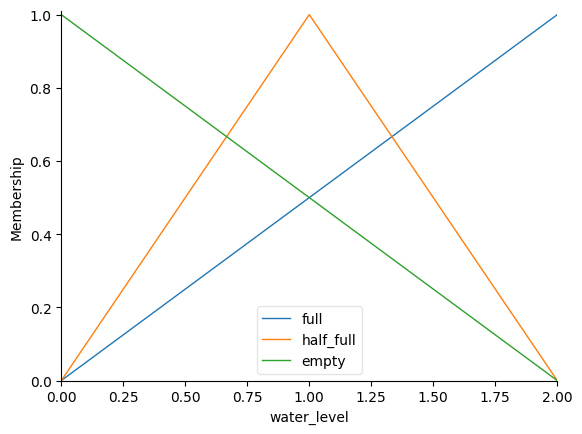

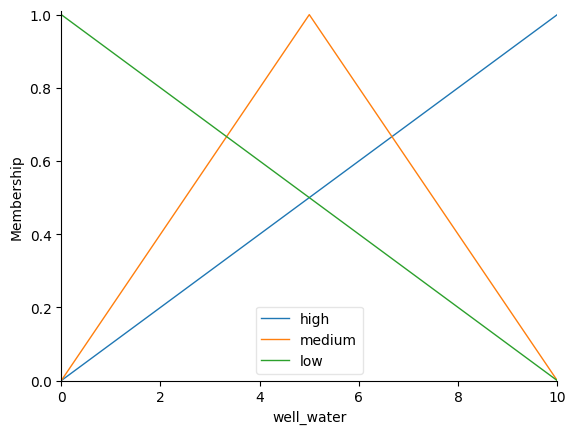

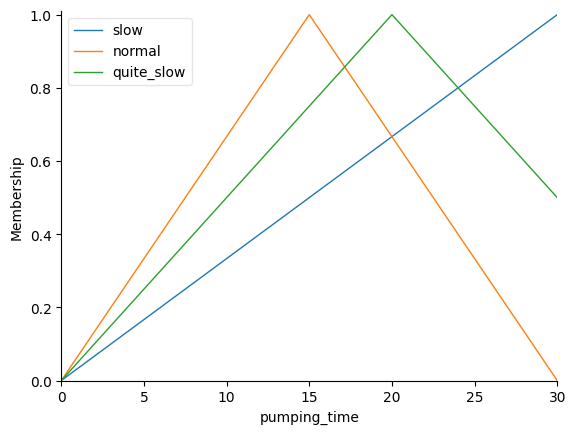

In [3]:
## 03 fuzzy set for water_level
water_level['full'] = fuzz.trimf(water_level.universe, [0, 2, 2])  # Full water
water_level['half_full'] = fuzz.trimf(water_level.universe, [0, 1, 2])  # Half full water
water_level['empty'] = fuzz.trimf(water_level.universe, [0, 0, 2])  # Empty water
water_level.view()

## 03 fuzzy set for well_water
well_water['high'] = fuzz.trimf(well_water.universe, [0, 10, 10])  # Well with high water
well_water['medium'] = fuzz.trimf(well_water.universe, [0, 5, 10])  # Well with medium water
well_water['low'] = fuzz.trimf(well_water.universe, [0, 0, 10])  # Well with low water
well_water.view()

## 03 fuzzy set for pumping_time
pumping_time['slow'] = fuzz.trimf(pumping_time.universe, [0, 30, 30])  # take lots of time
pumping_time['normal'] = fuzz.trimf(pumping_time.universe, [0, 15, 30])  # take a little time
pumping_time['quite_slow'] = fuzz.trimf(pumping_time.universe, [0, 20, 40])  # take some time
pumping_time.view()

In [4]:
# Define Fuzzy rules
# If the water in the tank is 'half-full' and the water in the well is 'high', then pumping_time will be 'normal'
rule1 = ctrl.Rule( water_level['half_full'] & well_water['high'], pumping_time['normal'] )

# If the water in the tank is 'empty' and the water in the well is 'high', then pumping_time will be 'slow'
rule2 = ctrl.Rule( water_level['empty'] & well_water['high'], pumping_time['slow'] )

# If the water in the tank is 'half-full' and the water in the well is 'medium', then pumping_time will be 'normal'
rule3 = ctrl.Rule( water_level['half_full'] & well_water['medium'], pumping_time['normal'] )

# If the water in the tank is 'empty' and the water in the well is 'medium', then pumping_time will be 'quite_slow'
rule4 = ctrl.Rule( water_level['empty'] & well_water['medium'], pumping_time['quite_slow'] )

In [5]:
# Let the system learns those rules
pump_speed = ctrl.ControlSystemSimulation(ctrl.ControlSystem([rule1, rule2, rule3, rule4]))

Enter the height of water in the tank (unit: meters): 1
Enter the height of water in the well (unit: meters): 3
In case the height of water in the tank is 1 (m) and the height of water in the well is 3 (m), the we have:
Pumping time: 16.62 minutes!

----------------------------
The chart will be performed as follow:


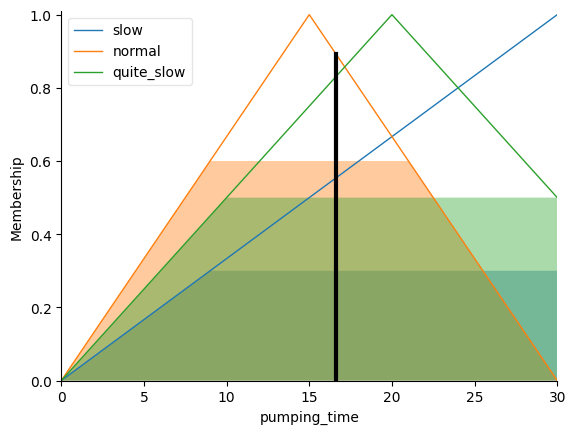

In [6]:
# Supposed data input
in_hn = input("Enter the height of water in the tank (unit: meters): ")
pump_speed.input['water_level'] = float(in_hn)

in_gn = input("Enter the height of water in the well (unit: meters): ")
pump_speed.input['well_water'] = float(in_gn)

# Computing
pump_speed.compute()

print("In case the height of water in the tank is", in_hn, "(m) and the height of water in the well is", in_gn, "(m), the we have:")
print("Pumping time:", f"{round(pump_speed.output['pumping_time'], 2)}", "minutes!")

print("\n----------------------------\nThe chart will be performed as follow:")
pumping_time.view(sim=pump_speed)